In [1]:
import os
from random import shuffle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
TRAIN_SIZE = 2500
VALID_SIZE = 250
TEST_SIZE = 250

## 이미지 파일 정보를 List로 저장 후 shuffle

In [3]:
# ( 파일 경로, 정답 레이블(남: 0, 여: 1) )
male_train_info = [('./male_grayscale/train/Gray_{}.png'.format(i+1), 0) for i in range(TRAIN_SIZE)]
female_train_info = [('./female_grayscale/train/Gray_{}.png'.format(i+1), 1) for i in range(TRAIN_SIZE)]
train_info = male_train_info + female_train_info
shuffle(train_info)
train_info[:5]

[('./male_grayscale/train/Gray_795.png', 0),
 ('./female_grayscale/train/Gray_1858.png', 1),
 ('./male_grayscale/train/Gray_1982.png', 0),
 ('./male_grayscale/train/Gray_2345.png', 0),
 ('./male_grayscale/train/Gray_2395.png', 0)]

In [4]:
# ( 파일 경로, 정답 레이블(남: 0, 여: 1) )
male_valid_info = [('./male_grayscale/valid/Gray_{}.png'.format(i+1), 0) for i in range(VALID_SIZE)]
female_valid_info = [('./female_grayscale/valid/Gray_{}.png'.format(i+1), 1) for i in range(VALID_SIZE)]
valid_info = male_valid_info + female_valid_info
shuffle(valid_info)
valid_info[:5]

[('./female_grayscale/valid/Gray_93.png', 1),
 ('./female_grayscale/valid/Gray_232.png', 1),
 ('./female_grayscale/valid/Gray_46.png', 1),
 ('./female_grayscale/valid/Gray_70.png', 1),
 ('./female_grayscale/valid/Gray_37.png', 1)]

In [5]:
# ( 파일 경로, 정답 레이블(남: 0, 여: 1) )
male_test_info = [('./male_grayscale/test/Gray_{}.png'.format(i+1), 0) for i in range(TEST_SIZE)]
female_test_info = [('./female_grayscale/test/Gray_{}.png'.format(i+1), 1) for i in range(TEST_SIZE)]
test_info = male_test_info + female_test_info
shuffle(test_info)
test_info[:5]

[('./male_grayscale/test/Gray_220.png', 0),
 ('./female_grayscale/test/Gray_110.png', 1),
 ('./male_grayscale/test/Gray_123.png', 0),
 ('./female_grayscale/test/Gray_212.png', 1),
 ('./female_grayscale/test/Gray_122.png', 1)]

In [6]:
# 이미지 파일 정보를 통해서 X, y를 구하는 함수
def getImageArray(image_info):
    X_list = []
    y_list = []

    for file_name, label in image_info:        
        img = Image.open(file_name)
        img_resized = img.resize((250, 125))
        img_array = np.array(img_resized) / 255.0
        X_list.append(img_array)
        y_list.append(label)

    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y

### train 데이터 셋의 numpy배열 구하기

In [7]:
X_train, y_train = getImageArray(train_info)

('./male_grayscale/train/Gray_795.png', 0)
0


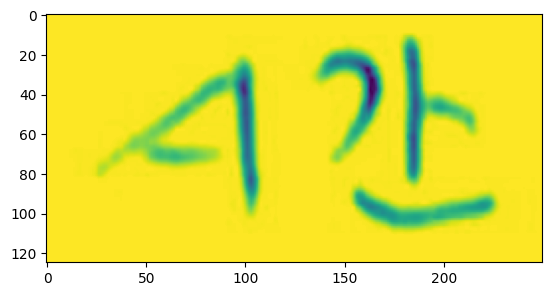

In [8]:
print(train_info[0])
print(y_train[0])
plt.imshow(X_train[0])
plt.show()

In [9]:
X_train = X_train.reshape(-1, 125, 250, 1)
y_train = y_train.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)

np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

(5000, 125, 250, 1)
(5000, 1)


### valid 데이터 셋의 numpy배열 구하기

In [10]:
X_valid, y_valid = getImageArray(valid_info)

('./female_grayscale/valid/Gray_93.png', 1)
1


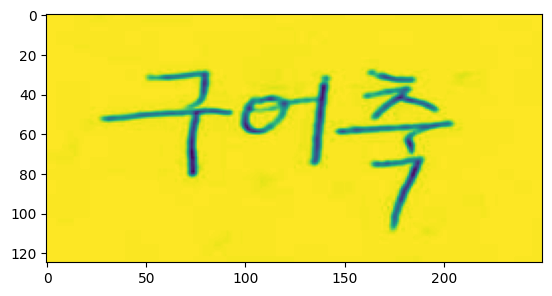

In [11]:
print(valid_info[0])
print(y_valid[0])
plt.imshow(X_valid[0])
plt.show()

In [12]:
X_valid = X_valid.reshape(-1, 125, 250, 1)
y_valid = y_valid.reshape(-1, 1)
print(X_valid.shape)
print(y_valid.shape)

np.save('X_valid.npy', X_valid)
np.save('y_valid.npy', y_valid)

(500, 125, 250, 1)
(500, 1)


### test 데이터 셋의 numpy배열 구하기

In [13]:
X_test, y_test = getImageArray(test_info)

('./male_grayscale/test/Gray_220.png', 0)
0


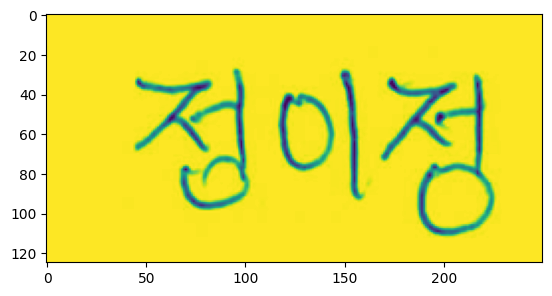

In [14]:
print(test_info[0])
print(y_test[0])
plt.imshow(X_test[0])
plt.show()

In [15]:
X_test = X_test.reshape(-1, 125, 250, 1)
y_test = y_test.reshape(-1, 1)
print(X_test.shape)
print(y_test.shape)

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

(500, 125, 250, 1)
(500, 1)
